너희가 내 안에 거하고 내 말이 너희 안에 거하면 무엇이든지 원하는 대로 구하라 그리하면 이루리라 (요15:7)
<center><img src="https://github.com/idebtor/KMOOC-ML/blob/master/ipynb/images/MLwithPython.png?raw=true" width=1000></center>

# Week 4-3 퍼셉트론 코딩

## 2. 학습자료 준비: 입력자료

In [1]:
import numpy as np
x = np.array([[1.0, 1.0], [2.0, -2.0],
              [-1.0, -1.5], [-2.0, -1.0,],
              [-2.0, 1.0], [1.5, -0.5]])
print(x)

[[ 1.   1. ]
 [ 2.  -2. ]
 [-1.  -1.5]
 [-2.  -1. ]
 [-2.   1. ]
 [ 1.5 -0.5]]


In [2]:
X = np.c_[np.ones(len(x)), x]
print(X)

[[ 1.   1.   1. ]
 [ 1.   2.  -2. ]
 [ 1.  -1.  -1.5]
 [ 1.  -2.  -1. ]
 [ 1.  -2.   1. ]
 [ 1.   1.5 -0.5]]


## 2.1 학습자료 준비: 클레스 레이블

In [3]:
y = np.array([1, -1, -1, -1, 1, 1])
print(y)

[ 1 -1 -1 -1  1  1]


## 2.2 학습자료 준비: 초기 가중치 설정

In [4]:
w = np.array([0.0, 1.0, 0.5])

In [5]:
w = np.random.random((X.shape[1], 1))

## 3. 퍼셉트론 알고리즘 코딩: 자료 연산

In [6]:
eta = 0.1
for xi, yi in zip(X, y):
    xi = xi.reshape(w.shape)
    z = np.dot(w.T, xi)
    yhat = np.where(z > 0.0, 1, -1)
    delta = eta * (yi - yhat) * xi
    w += delta
print(np.round(w, 2))

[[0.41]
 [0.28]
 [0.94]]


## 4. 퍼셉트론 전체 코드

In [7]:
%%writefile code/plot_xyw.py

%load code/plot_xyw.py
# Author: Youngsup Kim, idebtor@gmail.com
# 2018.03.01 - creation
# 2018.04.08 - handles an array of weights W, X0 options
# 2018.04.18 - works with plot_decision_region

import matplotlib.pyplot as plt
import numpy as np

def plot_xyw(x, y, W=None, X0=False, title='Perceptron',
             classes=['class1', 'class2'], annotate=False, savefig=None):
    """ plots data x and its class label y as well as the the linear decision
        boundary and and the value W[-1] or w. 

        x(m, 2): m training samples with two features, x1 and x2 only.
                 Its shape is (m, 2); X0 must be set to False.
        x(m, 3): m training samples with two features x0=1, x1, x2
                  its shape is (m, 3); X0 must be set to True.
        y(m): m number of class labels, each value may be either 1 or -1,
              also it may be either 1 or 0

        w(3,): only one boundary to display
               If you have an array of w's, but want to plot the last one, pass W[-1].
        W(epochs, 3): epochs number of decision boundaries or weights
              If there is one set of weights, its shape can be either (3, ) or (1, 3)

        X0: X has x_0 = 1 term in all samples or not; if True, removed before plotting
        annotate: add a sequence number at each sample if True
        savefig: save the plot in a file if a filename is given
    """
    if X0 == True:      # remove the first column; change shape(6x3) into shape(6x2)
        x = x[ : , 1:]     # check a column?: np.all(X == X[0,:], axis = 0)[0] == True and X[0,0] == 1.0

    # setting min max range of data - 10% of margin allowed in four sides
    rmin, rmax = np.array(np.min(x)), np.array(np.max(x))
    rmin -= (rmax - rmin) * 0.1
    rmax += (rmax - rmin) * 0.1

    nums = ['  {}'.format(i+1) for i in range(len(y))]    # numbering dots

    for num, ix, iy in zip(nums, x, y):
        if annotate == True:
            plt.annotate(num, xy=ix)

    # This handles class 1 and -1, class 1 and 0 as well.
    plt.scatter(x[y==1, 0], x[y==1, 1], label=classes[0], marker='s', s=9)
    plt.scatter(x[y!=1, 0], x[y!=1, 1], label=classes[1], marker='o', s=9)

    if W is not None:
        if W.ndim == 1:                             # one boundary in1-d array shape(3,)
            x1 = np.arange(rmin, rmax, .1)
            x2 = -W[0]/W[2] - W[1]/W[2]*x1
            plt.plot(x1, x2)
            title += ':w{}'.format(np.round(W, 2))          #display the weights at title
        else:
            for w in W:                                     # for every decision boundary
                x1 = np.arange(rmin, rmax, .1)
                x2 = -w[0]/w[2] - w[1]/w[2]*x1
                #display all decision boundaries and legend-weights
                plt.plot(x1, x2, label='w:{}'.format(np.round(w, 2)))
            title += ':w{}'.format(np.round(W[-1], 2))     #display the last weights at title

    plt.axhline(0, linewidth=1, linestyle='dotted')
    plt.axvline(0, linewidth=1, linestyle='dotted')
    plt.xlim([rmin, rmax])
    plt.ylim([rmin, rmax])
    plt.gca().set_aspect('equal')
    plt.title(title)
    plt.xlabel('$x_1$', fontsize=16)
    plt.ylabel('$x_2$', fontsize=16)
    if W is not None and W.ndim != 1:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        plt.legend(loc='best')
    plt.tight_layout()
    if savefig is not None:
        plt.savefig(savefig, bbox_inches='tight', dpi=150)



Overwriting code/plot_xyw.py


In [17]:
def perceptronV2(X,y,w=None,eta=0.1,epochs=10,random_seed=1):
    if w is None:
        randnum=np.random.RandomState(random_seed)
        w=randnum.normal(loc=0.0,scale=0.01,size=X.shape[1])
    maxy,miny=y.max(),y.min()
    for _ in np.arange(epochs):
        for xi,yi in zip(X,y):
            z=np.dot(xi,w)
            yhat=np.where(z>0.0,maxy,miny)
            if yhat!=yi:
                delta=eta*(yhat-yi)*xi
                w+=delta
    return w

[ 0.   3.4 -1.3]


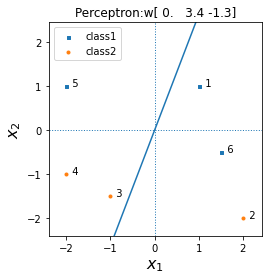

In [20]:
import joy
x = np.array([[1.0, 1.0], [2.0, -2.0], [-1.0, -1.5], [-2.0, -1.0], [-2.0, 1.0], [1.5, -0.5]])
X = np.c_[np.ones(len(x)), x]
y = np.array([1, -1, -1, -1, 1, 1])
w = np.array([0, 1.0, 0.5])
w=perceptronV2(X,y,w,eta=0.1,epochs=3)
print(np.round(w,2))
joy.plot_xyw(X,y,w,X0=True,annotate=True)

In [23]:
x = np.array([[1.0, 1.0], [2.0, -2.0], [-1.0, -1.5], [-2.0, -1.0], [-2.0, 1.0], [1.5, -0.5]])
X = np.c_[np.ones(len(x)), x]
y = np.array([1, -1, -1, -1, 1, 1])
w = np.array([0, 0.8, 1.1]).reshape(X.shape[1], 1)
#w = np.random.random((X,shape[1], 1))
maxlabel, minlabel = y.max(), y.min()

epochs = 1
eta = 0.1
for _ in range(epochs):
    for xi, yi in zip(X, y):
        xi = xi.reshape(w.shape)
        z = np.dot(w.T, xi)
        yhat = np.where(z > 0.0, maxlabel, minlabel)
        delta = eta * (yi - yhat) * xi
        w += delta
print(np.round(w, 2))

[[0.2]
 [0.4]
 [1.3]]


## 5. 퍼셉트론 함수 구현: 코드

In [24]:
#%%writefile code/perceptron.py
def perceptron(X, y, w = None, eta = 0.1, epochs = 5, random_seed = 1):
    if w is None:
        np.random.seed(random_seed)
        w = np.random.random((X.shape[1], 1))
    maxlable, minlabel = y.max(), y.min()
    for _ in range(epochs):
        for xi, yi in zip(X, y):
            xi = xi.reshape(w.shape)
            z = np.dot(w.T, xi)
            yhat = np.where(z >= 0.0, maxlabel, minlabel)
            delta = eta * (yi - yhat) * xi
            w += delta
    return w

## 5.1 퍼셉트론 함수 구현: 테스트와 시각화

In [25]:
#%%writefile code/plot_xyw.py

#%load code/plot_xyw.py
# Author: Youngsup Kim, idebtor@gmail.com
# 2018.03.01 - creation
# 2018.04.08 - handles an array of weights W, X0 options
# 2018.04.18 - works with plot_decision_region

import matplotlib.pyplot as plt
import numpy as np

def plot_xyw(x, y, W=None, X0=False, title='Perceptron',
             classes=['class1', 'class2'], annotate=False, savefig=None):
    """ plots data x and its class label y as well as the the linear decision
        boundary and and the value W[-1] or w. 

        x(m, 2): m training samples with two features, x1 and x2 only.
                 Its shape is (m, 2); X0 must be set to False.
        x(m, 3): m training samples with two features x0=1, x1, x2
                  its shape is (m, 3); X0 must be set to True.
        y(m): m number of class labels, each value may be either 1 or -1,
              also it may be either 1 or 0

        w(3,): only one boundary to display
               If you have an array of w's, but want to plot the last one, pass W[-1].
        W(epochs, 3): epochs number of decision boundaries or weights
              If there is one set of weights, its shape can be either (3, ) or (1, 3)

        X0: X has x_0 = 1 term in all samples or not; if True, removed before plotting
        annotate: add a sequence number at each sample if True
        savefig: save the plot in a file if a filename is given
    """
    if X0 == True:      # remove the first column; change shape(6x3) into shape(6x2)
        x = x[ : , 1:]     # check a column?: np.all(X == X[0,:], axis = 0)[0] == True and X[0,0] == 1.0

    # setting min max range of data - 10% of margin allowed in four sides
    rmin, rmax = np.array(np.min(x)), np.array(np.max(x))
    rmin -= (rmax - rmin) * 0.1
    rmax += (rmax - rmin) * 0.1

    nums = ['  {}'.format(i+1) for i in range(len(y))]    # numbering dots

    for num, ix, iy in zip(nums, x, y):
        if annotate == True:
            plt.annotate(num, xy=ix)

    # This handles class 1 and -1, class 1 and 0 as well.
    plt.scatter(x[y==1, 0], x[y==1, 1], label=classes[0], marker='s', s=9)
    plt.scatter(x[y!=1, 0], x[y!=1, 1], label=classes[1], marker='o', s=9)

    if W is not None:
        if W.ndim == 1:                             # one boundary in1-d array shape(3,)
            x1 = np.arange(rmin, rmax, .1)
            x2 = -W[0]/W[2] - W[1]/W[2]*x1
            plt.plot(x1, x2)
            title += ':w{}'.format(np.round(W, 2))          #display the weights at title
        else:
            for w in W:                                     # for every decision boundary
                x1 = np.arange(rmin, rmax, .1)
                x2 = -w[0]/w[2] - w[1]/w[2]*x1
                #display all decision boundaries and legend-weights
                plt.plot(x1, x2, label='w:{}'.format(np.round(w, 2)))
            title += ':w{}'.format(np.round(W[-1], 2))     #display the last weights at title

    plt.axhline(0, linewidth=1, linestyle='dotted')
    plt.axvline(0, linewidth=1, linestyle='dotted')
    plt.xlim([rmin, rmax])
    plt.ylim([rmin, rmax])
    plt.gca().set_aspect('equal')
    plt.title(title)
    plt.xlabel('$x_1$', fontsize=16)
    plt.ylabel('$x_2$', fontsize=16)
    if W is not None and W.ndim != 1:
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    else:
        plt.legend(loc='best')
    plt.tight_layout()
    if savefig is not None:
        plt.savefig(savefig, bbox_inches='tight', dpi=150)


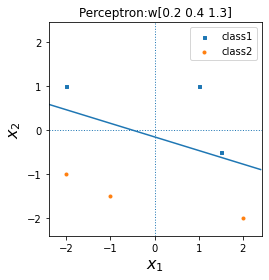

In [27]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#%run code/plot_xyw.py

x = np.array([[1.0, 1.0], [2.0, -2.0], [-1.0, -1.5], [-2.0, -1.0], [-2.0, 1.0], [1.5, -0.5]])
X = np.c_[np.ones(len(x)), x]
y = np.array([1, -1, -1, -1, 1, 1])
w = np.array([0, 0.8, 1.1])
w = perceptron(X, y, w, eta = 0.1, epochs =10)
plot_xyw(X, y, w, X0 = True)

## 5. 퍼셉트론 함수 구현: 에폭에 따른 판별식 시각화 

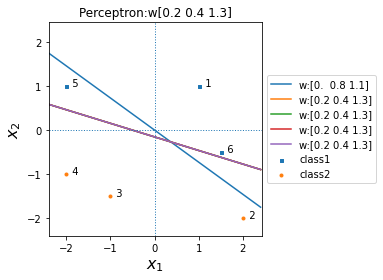

In [28]:
x = np.array([[1.0, 1.0], [2.0, -2.0], [-1.0, -1.5], [-2.0, -1.0], [-2.0, 1.0], [1.5, -0.5]])
X = np.c_[np.ones(len(x)), x]
y = np.array([1, -1, -1, -1, 1, 1])
w = np.array([0, 0.8,1.1])

W = np.array([w])
epochs = 4
for _ in range(epochs):
    w = perceptron(X, y, w, eta = 0.1, epochs =10)
    W = np.vstack([W, w])
    
plot_xyw(x, y, W, annotate = True)